In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pymsm.examples.crm_example_utils import create_test_data, stack_plot
from pymsm.utils import plot_stackplot
from pymsm.competing_risks_model import CompetingRisksModel

%load_ext autoreload
%autoreload 2

# Simple competing risks example

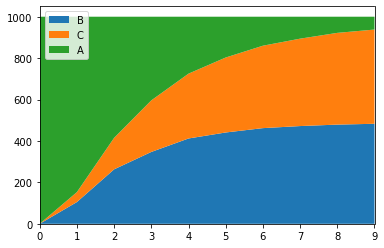

,id,sex,age,transition,T
0,0,0,30.0,2,2.0
1,1,1,69.0,2,4.0
2,2,0,39.0,2,17.0
3,3,0,63.0,2,1.0
4,4,0,66.0,1,2.0


In [2]:
N = 1000
data = create_test_data(N)
stack_plot(data)
data.head()

# Fit vanilla competing risk model

In [8]:
crm = CompetingRisksModel()

# Fit data
crm.fit(df=data, duration_col='T', event_col='transition', cluster_col='id')

# Plot predicted cifs
times = np.arange(10)
sample_covariates=np.array([0,50])
s1 = N * crm.predict_CIF(predict_at_t=times, sample_covariates=sample_covariates, failure_type=1)
s2 = N * crm.predict_CIF(predict_at_t=times, sample_covariates=sample_covariates, failure_type=2)
plot_stackplot(times, [s1,s2, (N-s1-s2)], ['B', 'C', 'A'])


>>> Fitting Transition to State: 2, n events: 509
>>> Fitting Transition to State: 1, n events: 491
0


ValueError: operands could not be broadcast together with shapes (1000,) (2,) 